In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="darkgrid")


from pprint import pprint


import os
import warnings
warnings.filterwarnings("ignore")

# setting params
params = {'legend.fontsize': 'medium',
          'figure.figsize': (14, 10),
          'axes.labelsize': 'medium',
          'axes.titlesize':'medium',
          'xtick.labelsize':'medium',
          'ytick.labelsize':'medium'}


sns.set_context('talk')

plt.rcParams.update(params)
pd.options.display.max_colwidth = 600 #(long description)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [3]:
df=pd.concat([train,test])

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [5]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [6]:
missing_values_table(df)

Your selected dataframe has 81 columns.
There are 35 columns that have missing values.


,Missing Values,% of Total Values
PoolQC,2909,99.7
MiscFeature,2814,96.4
Alley,2721,93.2
Fence,2348,80.4
SalePrice,1459,50.0
FireplaceQu,1420,48.6
LotFrontage,486,16.6
GarageCond,159,5.4
GarageYrBlt,159,5.4
GarageFinish,159,5.4


In [7]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [8]:
df.set_index('Id', inplace=True)

In [9]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [10]:
df.iloc[1460:,].head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,NaN
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,NaN
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,NaN
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal,NaN
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal,NaN


In [11]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [12]:
df.drop(columns=['PoolQC', 'MiscFeature','Alley', 'Fence'], inplace=True)

In [13]:
df.FireplaceQu.fillna(0, inplace=True)

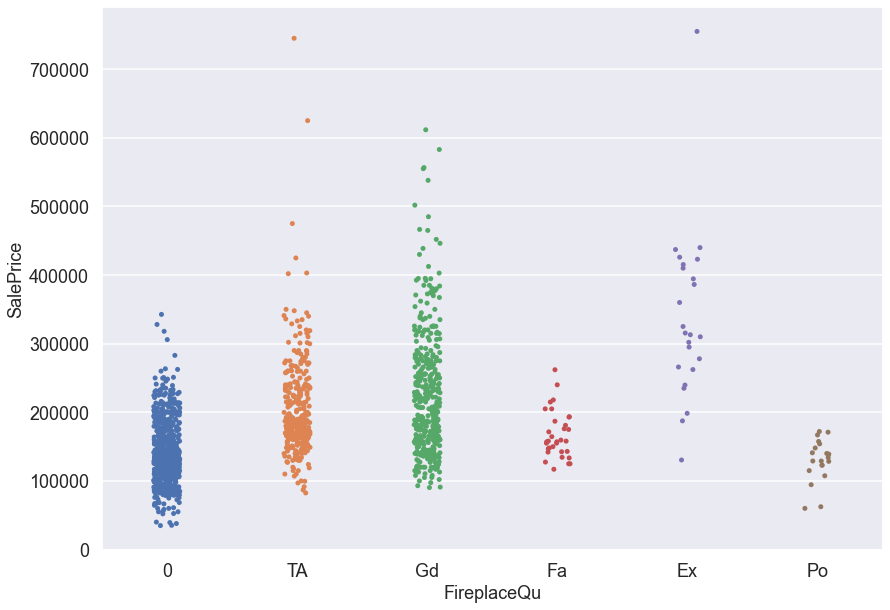

In [14]:
sns.stripplot('FireplaceQu', 'SalePrice', data=df)

In [15]:
df.LotFrontage.value_counts()

60.0     276
80.0     137
70.0     133
50.0     117
75.0     105
65.0      93
85.0      76
21.0      50
24.0      49
63.0      47
78.0      46
90.0      46
68.0      44
64.0      43
74.0      39
72.0      39
73.0      33
62.0      31
52.0      28
100.0     28
82.0      28
79.0      28
51.0      27
59.0      27
57.0      26
66.0      26
76.0      25
53.0      24
55.0      24
43.0      23
88.0      22
67.0      22
69.0      20
35.0      19
56.0      19
71.0      19
44.0      19
84.0      18
81.0      18
58.0      17
61.0      17
34.0      16
40.0      16
48.0      16
95.0      15
110.0     15
92.0      15
77.0      15
86.0      15
91.0      14
41.0      14
120.0     14
96.0      14
83.0      13
93.0      13
42.0      12
94.0      12
98.0      12
105.0     12
107.0     11
30.0      11
87.0      11
54.0      10
45.0      10
89.0      10
102.0     10
32.0       8
47.0       8
36.0       8
37.0       7
39.0       6
103.0      6
99.0       6
108.0      6
104.0      5
114.0      5
49.0       5

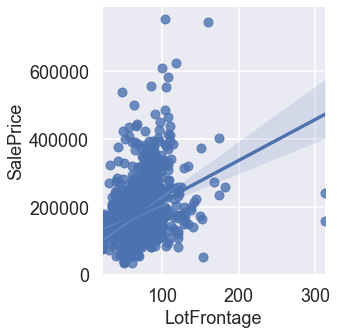

In [16]:
sns.lmplot('LotFrontage','SalePrice', data=df)
plt.show()

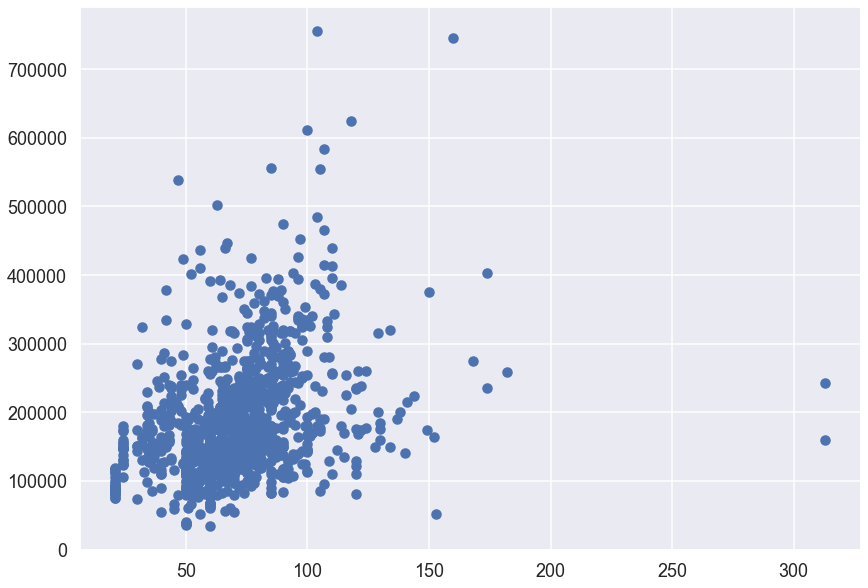

In [17]:
plt.scatter('LotFrontage','SalePrice', data=df)
plt.show()

In [18]:
df[['LotFrontage','SalePrice']].corr()

,LotFrontage,SalePrice
LotFrontage,1.000000,0.351799
SalePrice,0.351799,1.000000


In [19]:
df[['LotFrontage','LotArea']].corr()

,LotFrontage,LotArea
LotFrontage,1.000000,0.489896
LotArea,0.489896,1.000000


In [20]:
df['LotAreaCut'] = pd.qcut(df.LotArea, 20)

In [21]:
df.groupby(['LotAreaCut'])[['LotFrontage']].agg(['mean', 'median', 'count'])

LotFrontage             
                           mean median count
LotAreaCut                                  
(1299.999, 3182.0]    26.618321   24.0   131
(3182.0, 4922.4]      45.700000   42.0   120
(4922.4, 6120.0]      53.074324   50.0   148
(6120.0, 7007.6]      58.428571   60.0   119
(7007.6, 7478.0]      61.776923   60.0   130
(7478.0, 7960.4]      64.341667   64.0   120
(7960.4, 8390.9]      65.656000   65.0   125
(8390.9, 8741.0]      68.213740   68.0   131
(8741.0, 9045.0]      68.390244   68.0   123
(9045.0, 9453.0]      71.866667   71.0   120
(9453.0, 9750.0]      73.045113   75.0   133
(9750.0, 10151.6]     74.975610   75.0   123
(10151.6, 10550.5]    74.880952   78.0   126
(10550.5, 11001.2]    72.420635   72.0   126
(11001.2, 11570.0]    82.390909   83.0   110
(11570.0, 12203.8]    84.296610   82.0   118
(12203.8, 13072.0]    81.596330   82.0   109
(13072.0, 14300.6]    88.100840   86.0   119
(14300.6, 17142.9]    87.527778   85.0   108
(17142.9, 215245.0]  101.840426   94.5    94

In [22]:
df['LotFrontage'] = df.groupby(['LotAreaCut', 'Neighborhood'])['LotFrontage'].transform(lambda x: x.fillna(x.median()))

In [23]:
df.LotFrontage.isna().sum()

15

In [24]:
df['LotFrontage'] = df.groupby(['LotAreaCut'])['LotFrontage'].transform(lambda x: x.fillna(x.median()))

In [25]:
df.LotFrontage.isna().sum()

0

In [26]:
df=df.drop(columns='LotAreaCut')

In [27]:
cols=["MasVnrArea", "BsmtUnfSF", "TotalBsmtSF", "GarageCars", "BsmtFinSF2", "BsmtFinSF1", "GarageArea", "GarageYrBlt", "GarageQual", "GarageCond",
      "KitchenQual","BsmtCond", "BsmtQual"]
for col in cols:
    df[col].fillna(0, inplace=True)

In [28]:
cols1 = [ "GarageFinish",  "GarageType", "BsmtExposure", "BsmtFinType2", "BsmtFinType1", "MasVnrType"]
for col in cols1:
    df[col].fillna("None", inplace=True)

In [29]:
cols2 = ["MSZoning", "BsmtFullBath", "BsmtHalfBath", "Utilities", "Functional", "Electrical", "SaleType","Exterior1st", "Exterior2nd"]
for col in cols2:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [30]:
missing_values_table(df)

Your selected dataframe has 76 columns.
There are 1 columns that have missing values.


,Missing Values,% of Total Values
SalePrice,1459,50.0


In [31]:
mapping={0:0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}


mapping1={'None':0, 'Unf':1, 'LwQ':2, 'Rec':4, 'BLQ':5, 'ALQ':6, 'GLQ':7}


In [32]:
df['KitchenQual'].value_counts()

TA    1492
Gd    1151
Ex     205
Fa      70
0        1
Name: KitchenQual, dtype: int64

In [33]:
col1=['HeatingQC','ExterQual','ExterCond', 'FireplaceQu']

In [34]:
for col in col1:
    df[col] = df[col].map(mapping)

In [35]:
df.HeatingQC.value_counts()

5    1493
3     857
4     474
2      92
1       3
Name: HeatingQC, dtype: int64

In [36]:
df.ExterQual.value_counts()

3    1798
4     979
5     107
2      35
Name: ExterQual, dtype: int64

In [37]:
df.ExterCond.value_counts()

3    2538
4     299
2      67
5      12
1       3
Name: ExterCond, dtype: int64

In [38]:
col2=['GarageQual', 'GarageCond', 'KitchenQual', 'BsmtCond', 'BsmtQual']

for col in col2:
    df[col] = df[col].map(mapping)

In [39]:
df.GarageQual.value_counts()

3    2604
0     159
2     124
4      24
1       5
5       3
Name: GarageQual, dtype: int64

In [40]:
mapping1={'None':0, 'Unf':1, 'LwQ':2, 'Rec':4, 'BLQ':5, 'ALQ':6, 'GLQ':7}

col3=['BsmtFinType2','BsmtFinType1']

for col in col3:
    df[col]=df[col].map(mapping1)

In [41]:
df.BsmtFinType2.value_counts()

1    2493
4     105
2      87
0      80
5      68
6      52
7      34
Name: BsmtFinType2, dtype: int64

In [42]:
map2={'N':0, 'Y':1}

df['CentralAir'] =df['CentralAir'].map(map2)

In [43]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,4,3,PConc,4,3,No,7,706.0,1,0.0,150.0,856.0,GasA,5,1,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,4,8,Typ,0,0,Attchd,2003.0,RFn,2.0,548.0,3,3,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500.0
2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,3,3,CBlock,4,3,Gd,6,978.0,1,0.0,284.0,1262.0,GasA,5,1,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,3,6,Typ,1,3,Attchd,1976.0,RFn,2.0,460.0,3,3,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500.0
3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,4,3,PConc,4,3,Mn,7,486.0,1,0.0,434.0,920.0,GasA,5,1,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,4,6,Typ,1,3,Attchd,2001.0,RFn,2.0,608.0,3,3,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500.0
4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,3,3,BrkTil,3,4,No,6,216.0,1,0.0,540.0,756.0,GasA,4,1,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,4,7,Typ,1,4,Detchd,1998.0,Unf,3.0,642.0,3,3,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000.0
5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,4,3,PConc,4,3,Av,7,655.0,1,0.0,490.0,1145.0,GasA,5,1,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,4,9,Typ,1,3,Attchd,2000.0,RFn,3.0,836.0,3,3,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000.0


In [44]:
missing_values_table(df)

Your selected dataframe has 76 columns.
There are 1 columns that have missing values.


,Missing Values,% of Total Values
SalePrice,1459,50.0


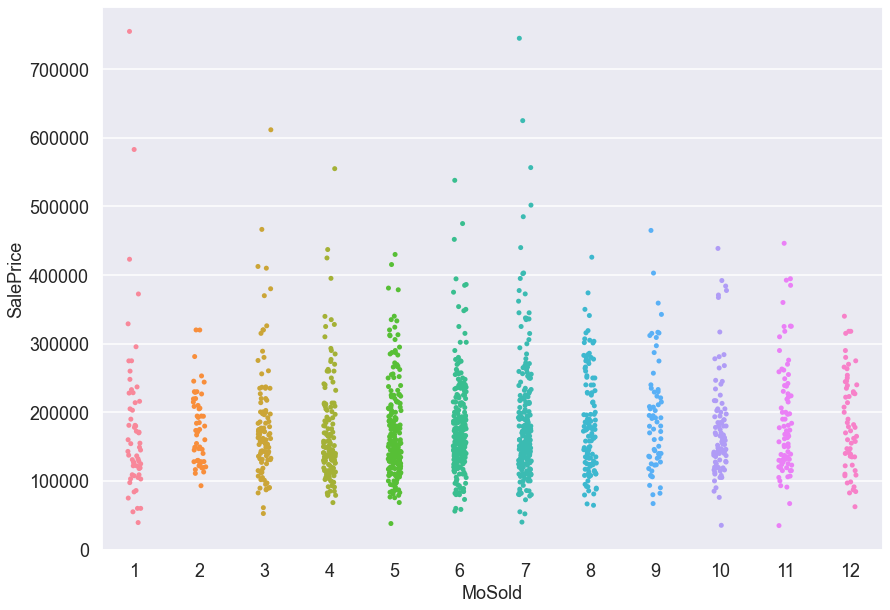

In [45]:
sns.stripplot('MoSold', 'SalePrice', data=df)
plt.show()

In [46]:
df['MSSubClass'] = df['MSSubClass'] .astype('category')

In [47]:
df_miss=missing_values_table(df)

Your selected dataframe has 76 columns.
There are 1 columns that have missing values.


In [48]:
df[df.columns[~df.columns.isin(df_miss.index)]].select_dtypes(exclude=['object', 'float64']).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 1 to 2919
Data columns (total 37 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   MSSubClass     2919 non-null   category
 1   LotArea        2919 non-null   int64   
 2   OverallQual    2919 non-null   int64   
 3   OverallCond    2919 non-null   int64   
 4   YearBuilt      2919 non-null   int64   
 5   YearRemodAdd   2919 non-null   int64   
 6   ExterQual      2919 non-null   int64   
 7   ExterCond      2919 non-null   int64   
 8   BsmtQual       2919 non-null   int64   
 9   BsmtCond       2919 non-null   int64   
 10  BsmtFinType1   2919 non-null   int64   
 11  BsmtFinType2   2919 non-null   int64   
 12  HeatingQC      2919 non-null   int64   
 13  CentralAir     2919 non-null   int64   
 14  1stFlrSF       2919 non-null   int64   
 15  2ndFlrSF       2919 non-null   int64   
 16  LowQualFinSF   2919 non-null   int64   
 17  GrLivArea      2919 non-null   in

In [49]:
df_dum=pd.get_dummies(df, drop_first=True)

In [50]:
df_dum.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,65.0,8450,7,5,2003,2003,196.0,4,3,4,3,7,706.0,1,0.0,150.0,856.0,5,1,856,854,0,1710,1.0,0.0,2,1,3,1,4,8,0,0,2003.0,2.0,548.0,3,3,0,61,0,0,0,0,0,2,2008,208500.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [51]:
df_dum.shape

(2919, 223)

In [52]:
df_new=df_dum.iloc[:1460]

In [53]:
df_new.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,65.0,8450,7,5,2003,2003,196.0,4,3,4,3,7,706.0,1,0.0,150.0,856.0,5,1,856,854,0,1710,1.0,0.0,2,1,3,1,4,8,0,0,2003.0,2.0,548.0,3,3,0,61,0,0,0,0,0,2,2008,208500.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [54]:
from sklearn.utils import shuffle

df_new=shuffle(df_new)

## Checking score of the train data

In [55]:
X=df_new.drop(columns='SalePrice')
y=df_new.SalePrice

In [56]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1,random_state=42)

In [57]:


from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, cross_val_score, KFold
from sklearn.ensemble import RandomForestRegressor

In [58]:
#cv = KFold(n_splits=5, random_state=1, shuffle=True)

In [59]:
#scores = cross_val_score(rf, X_train, y_train,  cv=cv)


## Randomized Grid Search

In [65]:
# Number of trees in random forest
n_estimators=[int(x) for x in np.linspace(start = 200, stop = 1000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)


{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 288, 377, 466, 555, 644, 733, 822, 911, 1000]}


In [66]:
rf=RandomForestRegressor(random_state=0)

rf_random=RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 10, scoring='neg_mean_absolute_error', 
                              cv = 3, verbose=2, random_state=42, n_jobs=-1,
                              return_train_score=True)

In [67]:
rf_random.fit(X_train, y_train)


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.3min finished


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=0),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 288, 377, 466,
                                                         555, 644, 733, 822,
                                                         911, 1000]},
                   random_state=42, return_train_score=True,
                   scoring='neg_mean_absolute_error', verbose=2)

In [68]:
rf_random.best_params_

{'n_estimators': 288,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 60,
 'bootstrap': False}

In [69]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy


In [70]:
rf_random.best_estimator_

RandomForestRegressor(bootstrap=False, max_depth=60, max_features='sqrt',
                      min_samples_split=10, n_estimators=288, random_state=0)

In [71]:
best_rand=rf_random.best_estimator_

rand_accu=evaluate(best_rand,X_test, y_test)

Model Performance
Average Error: 19577.0136 degrees.
Accuracy = 89.48%.


In [72]:
predictions=best_rand.predict(X_test)

In [73]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 19577.0136051995
MSE: 1324127280.7937665
RMSE: 36388.55975157256


## Grid Search

In [74]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [False],
    'max_depth': [60,80, 90],
    'max_features': ['sqrt',20],
    'min_samples_leaf': [2,3, 4],
    'min_samples_split': [8, 10, 15],
    'n_estimators': [100, 200, 300],
    'random_state':[0]
}

# Create a base model
rf = RandomForestRegressor(random_state = 0)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2, return_train_score=True)


In [75]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 162 candidates, totalling 486 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   38.7s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 486 out of 486 | elapsed:  2.0min finished


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=0), n_jobs=-1,
             param_grid={'bootstrap': [False], 'max_depth': [60, 80, 90],
                         'max_features': ['sqrt', 20],
                         'min_samples_leaf': [2, 3, 4],
                         'min_samples_split': [8, 10, 15],
                         'n_estimators': [100, 200, 300], 'random_state': [0]},
             return_train_score=True, verbose=2)

In [76]:
grid_search.best_params_

{'bootstrap': False,
 'max_depth': 60,
 'max_features': 20,
 'min_samples_leaf': 2,
 'min_samples_split': 8,
 'n_estimators': 300,
 'random_state': 0}

In [77]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=False, max_depth=60, max_features=20,
                      min_samples_leaf=2, min_samples_split=8, n_estimators=300,
                      random_state=0)

In [78]:
best_grid=grid_search.best_estimator_

grid_accu=evaluate(best_grid, X_test, y_test)

Model Performance
Average Error: 19051.4991 degrees.
Accuracy = 89.74%.


In [79]:
final_model=grid_search.best_estimator_


In [80]:
predictions=final_model.predict(X_test)

In [82]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 19051.49908015354
MSE: 1247508384.3761902
RMSE: 35320.08471643564


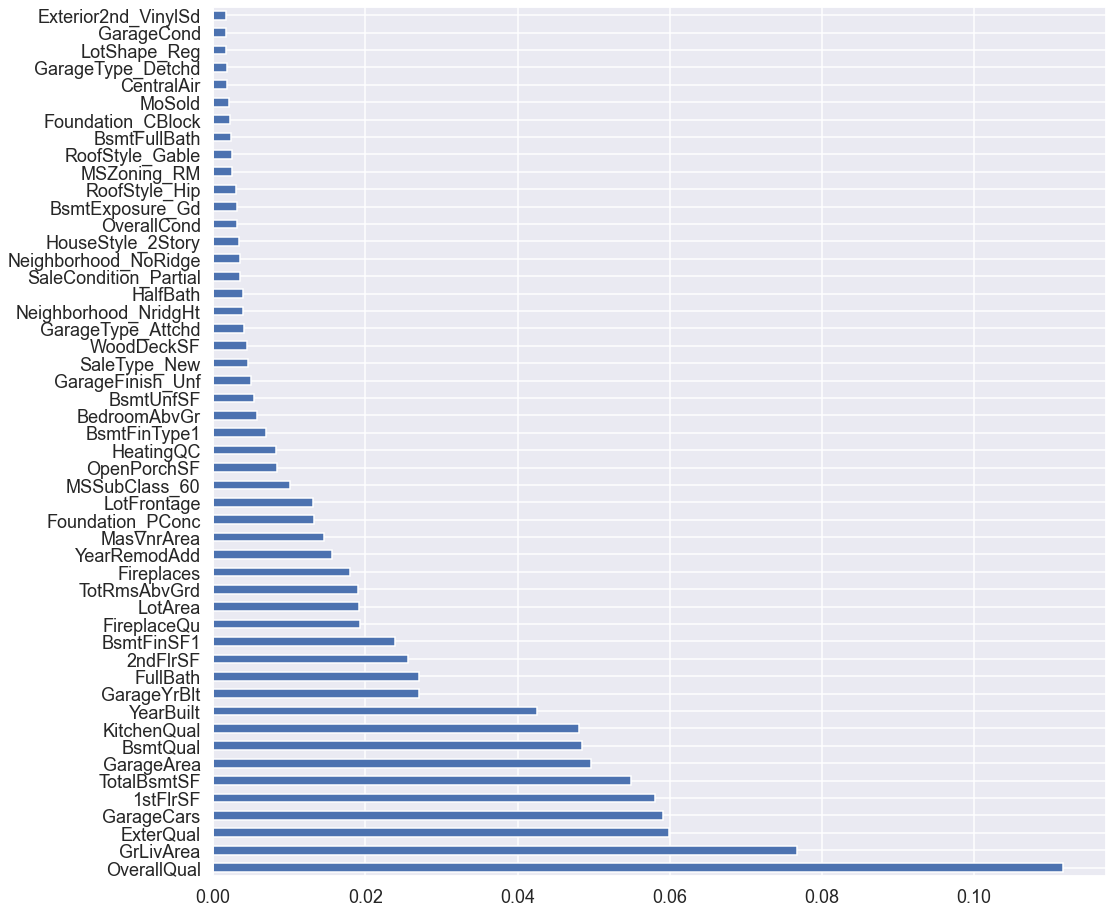

In [83]:
# Feature importance as a 
plt.figure(figsize=(16, 16))
feat_importances = pd.Series(final_model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(50).plot(kind='barh')

## Submission#1

In [84]:
df_dum.shape

(2919, 223)

In [85]:
def divide_df(df_dum):
    return df_dum.iloc[:1460], df_dum.iloc[1460:]

In [86]:
X_train, X_test=divide_df(df_dum.drop(columns='SalePrice'))

In [87]:

y_train=df_dum.iloc[:1460].SalePrice

In [88]:
print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)


X_train shape: (1460, 222)
y_train shape: (1460,)
X_test shape: (1459, 222)


In [89]:
final_model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=False, max_depth=60, max_features=20,
                      min_samples_leaf=2, min_samples_split=8, n_estimators=300,
                      random_state=0)

In [90]:
pred= final_model.predict(X_test)

### To CSV

In [ ]:
test=pd.read_csv('test.csv')


In [ ]:
submission1=pd.DataFrame({'Id':test['Id'], 'SalePrice':pred})

In [ ]:
submission1.to_csv('submission1.csv', index=False)

In [ ]:
submission1.head()

## Voting Regressor

In [91]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,4,3,PConc,4,3,No,7,706.0,1,0.0,150.0,856.0,GasA,5,1,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,4,8,Typ,0,0,Attchd,2003.0,RFn,2.0,548.0,3,3,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500.0
2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,3,3,CBlock,4,3,Gd,6,978.0,1,0.0,284.0,1262.0,GasA,5,1,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,3,6,Typ,1,3,Attchd,1976.0,RFn,2.0,460.0,3,3,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500.0
3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,4,3,PConc,4,3,Mn,7,486.0,1,0.0,434.0,920.0,GasA,5,1,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,4,6,Typ,1,3,Attchd,2001.0,RFn,2.0,608.0,3,3,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500.0
4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,3,3,BrkTil,3,4,No,6,216.0,1,0.0,540.0,756.0,GasA,4,1,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,4,7,Typ,1,4,Detchd,1998.0,Unf,3.0,642.0,3,3,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000.0
5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,4,3,PConc,4,3,Av,7,655.0,1,0.0,490.0,1145.0,GasA,5,1,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,4,9,Typ,1,3,Attchd,2000.0,RFn,3.0,836.0,3,3,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000.0


In [92]:
missing_values_table(df)

Your selected dataframe has 76 columns.
There are 1 columns that have missing values.


,Missing Values,% of Total Values
SalePrice,1459,50.0


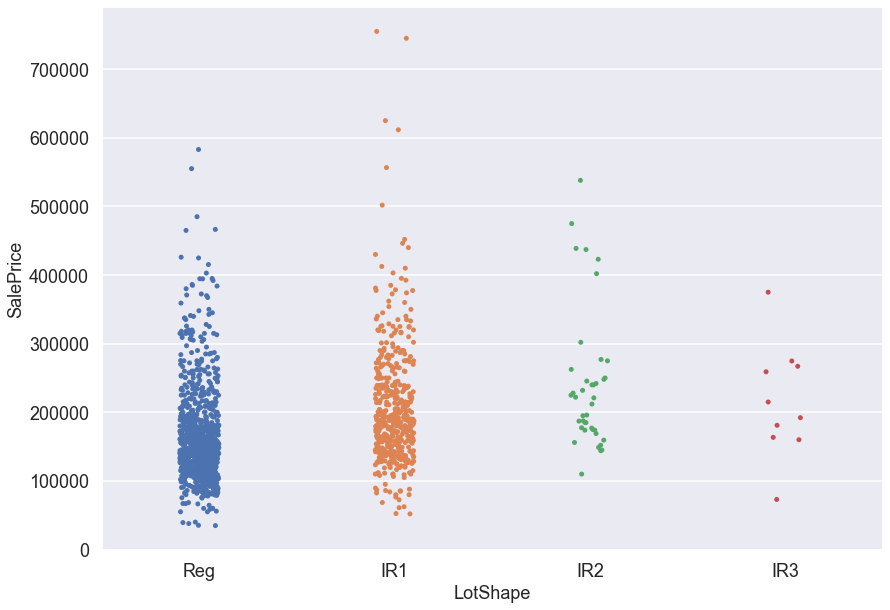

In [95]:
sns.stripplot('LotShape', 'SalePrice', data=df)

In [96]:
df_vot=df

In [97]:
df_vot.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
LotFrontage,2919.0,69.777492,22.638226,21.0,60.0,70.0,80.0,313.0
LotArea,2919.0,10168.114080,7886.996359,1300.0,7478.0,9453.0,11570.0,215245.0
OverallQual,2919.0,6.089072,1.409947,1.0,5.0,6.0,7.0,10.0
OverallCond,2919.0,5.564577,1.113131,1.0,5.0,5.0,6.0,9.0
YearBuilt,2919.0,1971.312778,30.291442,1872.0,1953.5,1973.0,2001.0,2010.0
YearRemodAdd,2919.0,1984.264474,20.894344,1950.0,1965.0,1993.0,2004.0,2010.0
MasVnrArea,2919.0,101.396026,178.854579,0.0,0.0,0.0,163.5,1600.0
ExterQual,2919.0,3.396711,0.580293,2.0,3.0,3.0,4.0,5.0
ExterCond,2919.0,3.085646,0.372361,1.0,3.0,3.0,3.0,5.0
BsmtQual,2919.0,3.477561,0.905448,0.0,3.0,4.0,4.0,5.0


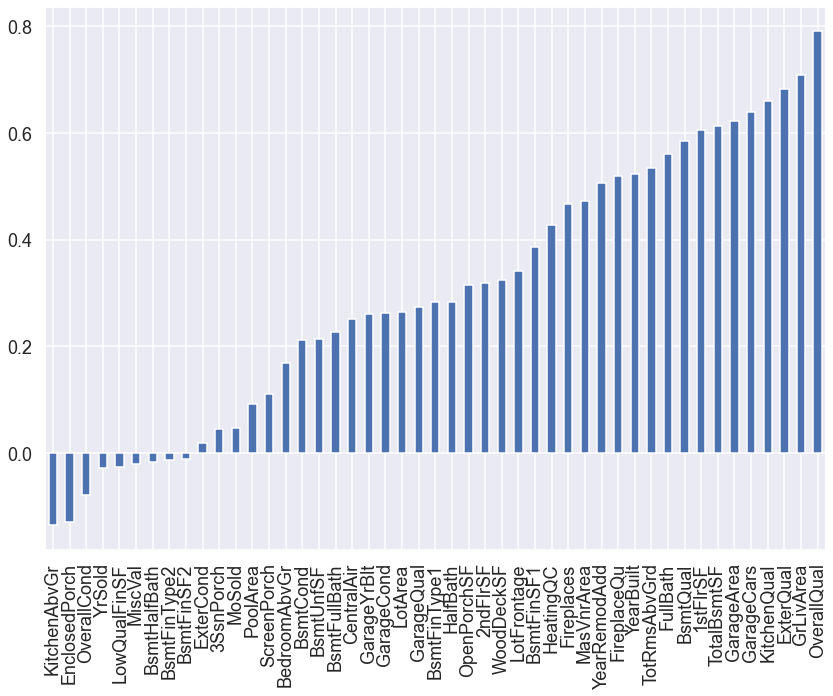

In [98]:
df_vot.corr()['SalePrice'][:-1] .sort_values().plot(kind='bar')
plt.show()

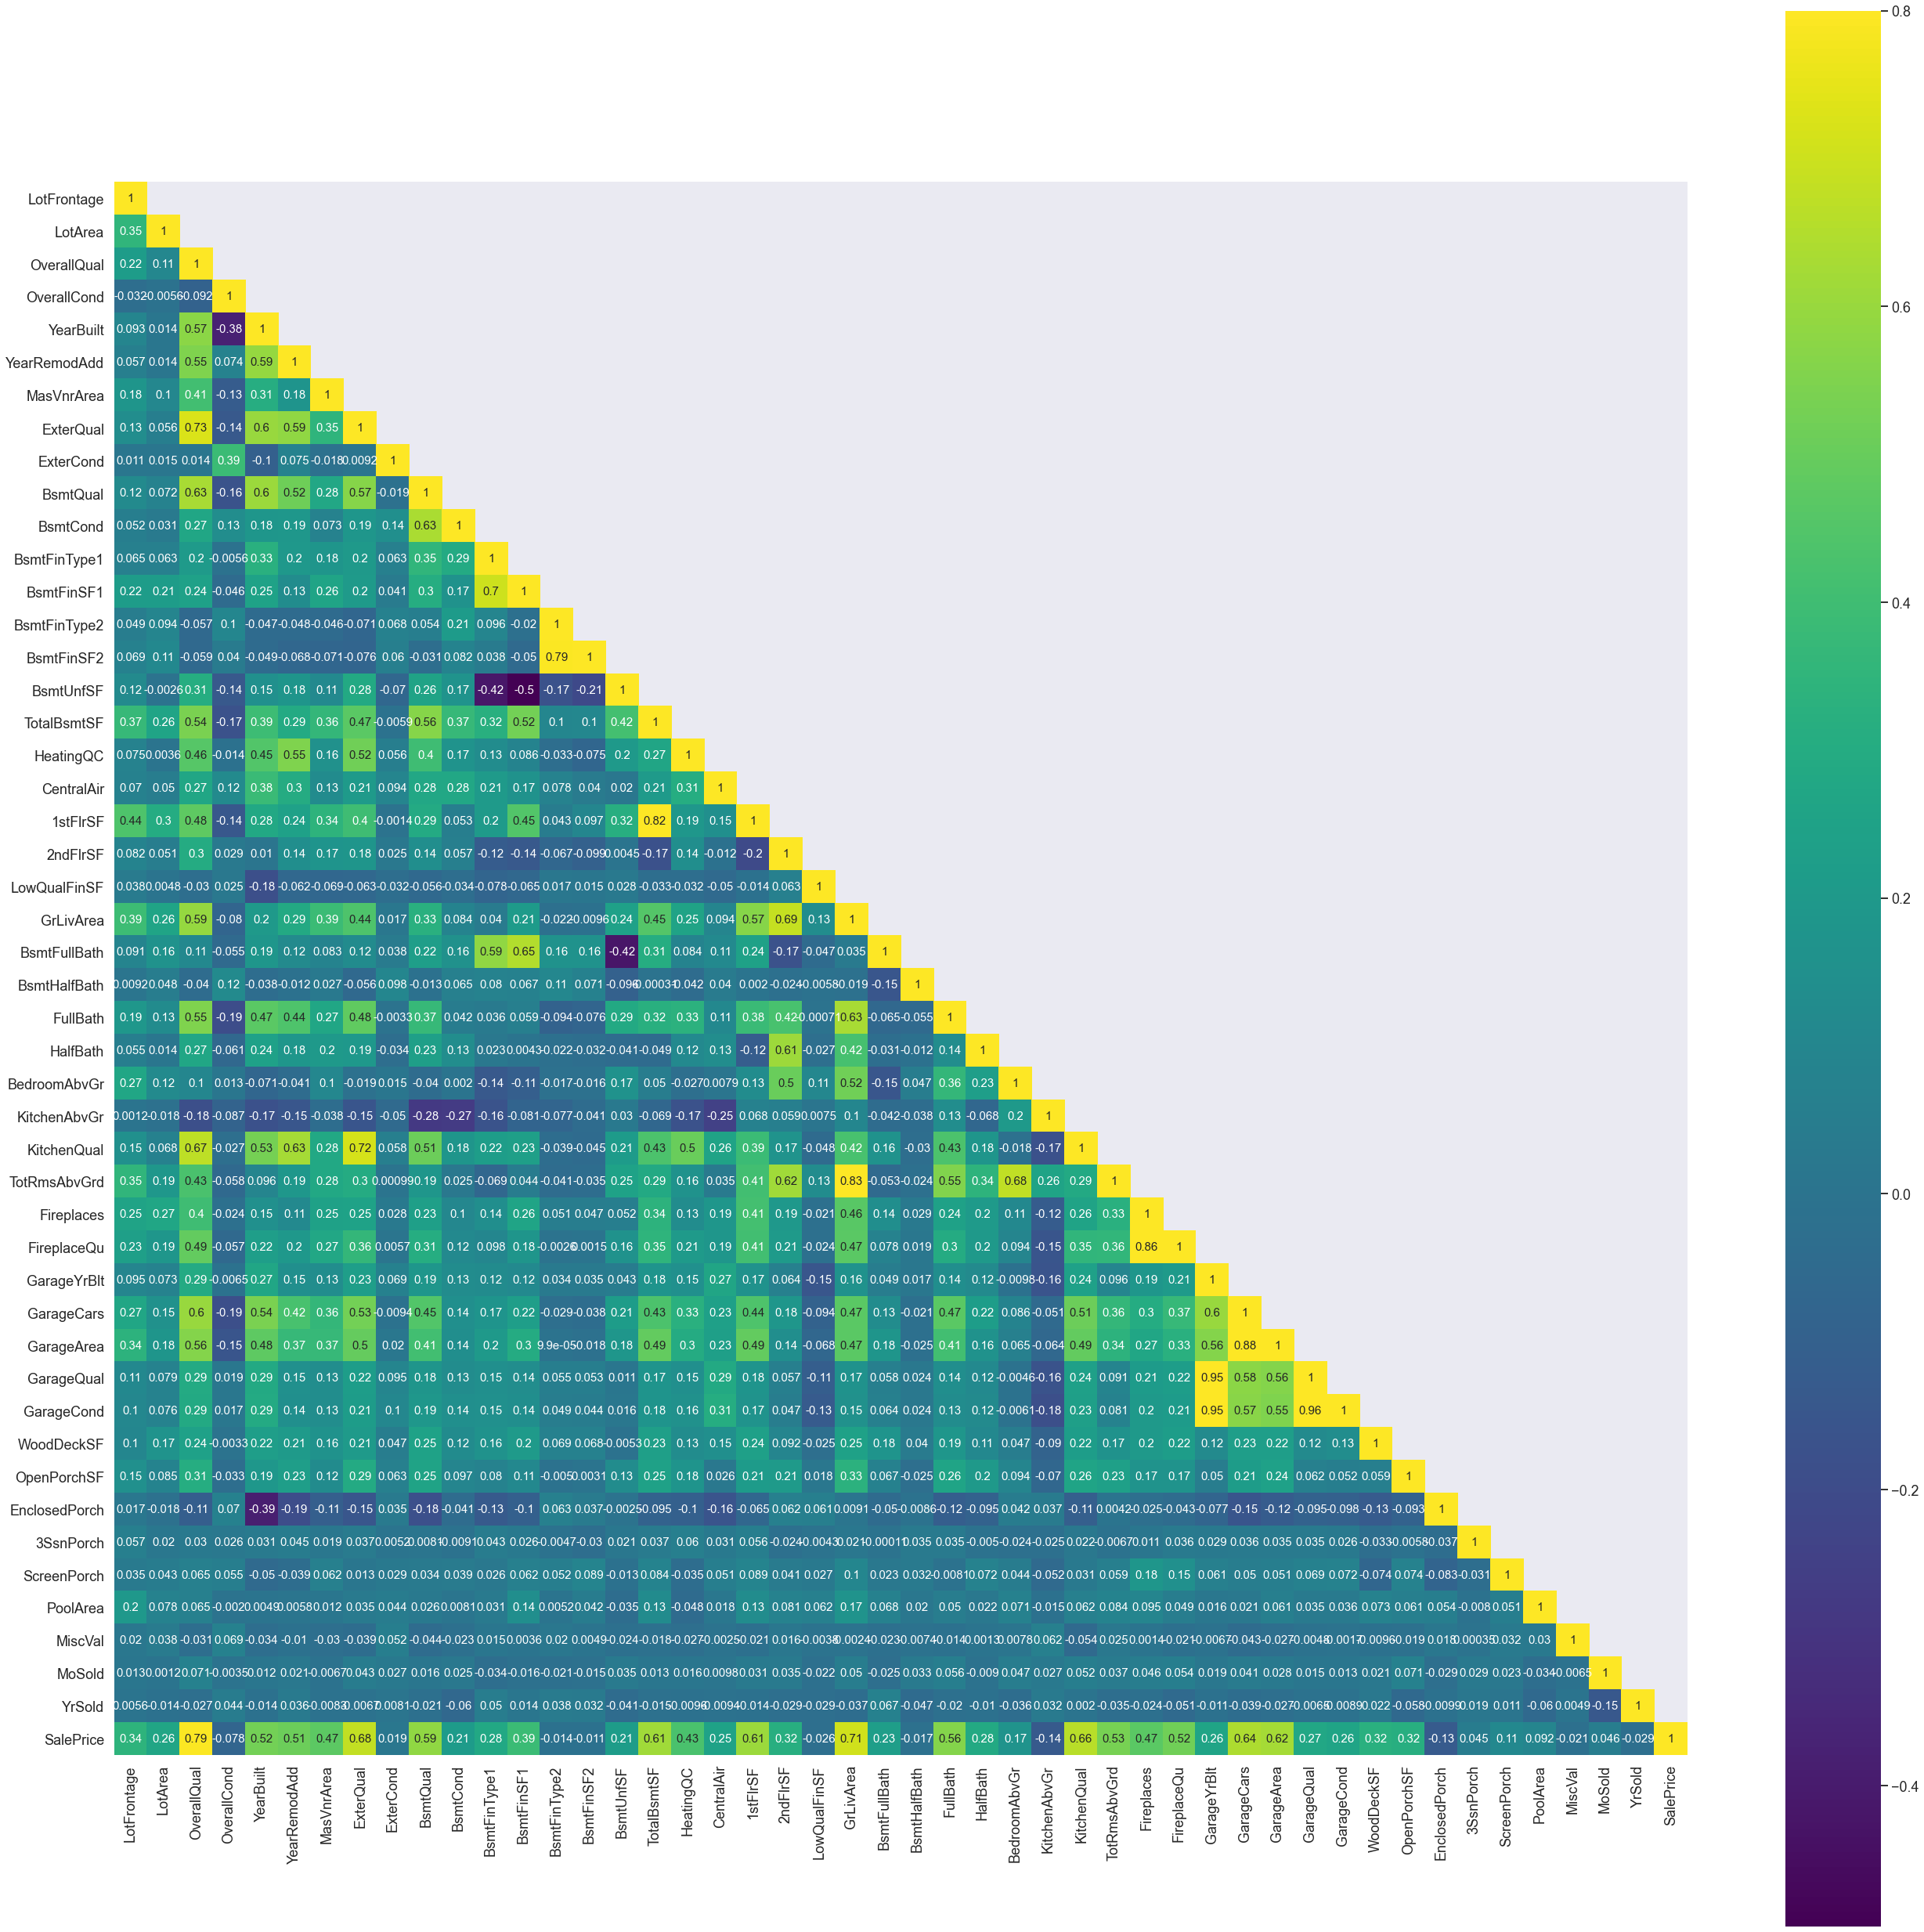

In [99]:
#heatmap correlation matrix with mask 
plt.figure(figsize=(45,45))
mask=np.array(df_vot.iloc[:1460].corr())
mask[np.tril_indices_from(mask)] = False

sns.heatmap(df_vot.iloc[:1460].corr(), annot=True,mask=mask, vmax=.8, square=True, cmap='viridis', annot_kws={'size':15})

plt.show()

In [100]:

df_num=df_vot.select_dtypes(include=['int64','float64'])

In [101]:
df_num1=df_num.iloc[:1460]

In [102]:
df_num1.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,65.0,8450,7,5,2003,2003,196.0,4,3,4,3,7,706.0,1,0.0,150.0,856.0,5,1,856,854,0,1710,1.0,0.0,2,1,3,1,4,8,0,0,2003.0,2.0,548.0,3,3,0,61,0,0,0,0,0,2,2008,208500.0
2,80.0,9600,6,8,1976,1976,0.0,3,3,4,3,6,978.0,1,0.0,284.0,1262.0,5,1,1262,0,0,1262,0.0,1.0,2,0,3,1,3,6,1,3,1976.0,2.0,460.0,3,3,298,0,0,0,0,0,0,5,2007,181500.0
3,68.0,11250,7,5,2001,2002,162.0,4,3,4,3,7,486.0,1,0.0,434.0,920.0,5,1,920,866,0,1786,1.0,0.0,2,1,3,1,4,6,1,3,2001.0,2.0,608.0,3,3,0,42,0,0,0,0,0,9,2008,223500.0
4,60.0,9550,7,5,1915,1970,0.0,3,3,3,4,6,216.0,1,0.0,540.0,756.0,4,1,961,756,0,1717,1.0,0.0,1,0,3,1,4,7,1,4,1998.0,3.0,642.0,3,3,0,35,272,0,0,0,0,2,2006,140000.0
5,84.0,14260,8,5,2000,2000,350.0,4,3,4,3,7,655.0,1,0.0,490.0,1145.0,5,1,1145,1053,0,2198,1.0,0.0,2,1,4,1,4,9,1,3,2000.0,3.0,836.0,3,3,192,84,0,0,0,0,0,12,2008,250000.0


In [103]:


#check Variance Inflation Factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Get variables for which to compute VIF and add intercept term
A = df_num1.drop(columns='SalePrice')
A['Intercept'] = 1 

# Compute and view VIF
vif = pd.DataFrame()
vif["variables"] = A.columns
vif["VIF"] = [variance_inflation_factor(A.values, i) for i in range(A.shape[1])]

# View results using print
print(round(vif,2))


        variables         VIF
0     LotFrontage        1.55
1         LotArea        1.30
2     OverallQual        3.85
3     OverallCond        1.96
4       YearBuilt        4.97
5    YearRemodAdd        2.70
6      MasVnrArea        1.42
7       ExterQual        3.12
8       ExterCond        1.25
9        BsmtQual        4.35
10       BsmtCond        2.70
11   BsmtFinType1        2.58
12     BsmtFinSF1         inf
13   BsmtFinType2        2.98
14     BsmtFinSF2         inf
15      BsmtUnfSF         inf
16    TotalBsmtSF         inf
17      HeatingQC        1.72
18     CentralAir        1.52
19       1stFlrSF         inf
20       2ndFlrSF         inf
21   LowQualFinSF         inf
22      GrLivArea         inf
23   BsmtFullBath        2.37
24   BsmtHalfBath        1.17
25       FullBath        2.95
26       HalfBath        2.22
27   BedroomAbvGr        2.45
28   KitchenAbvGr        1.50
29    KitchenQual        2.71
30   TotRmsAbvGrd        4.93
31     Fireplaces        4.76
32    Fire

In [104]:
# BsmtFinSF1 GrLivArea LowQualFinSF  2ndFlrSF   1stFlrSF  TotalBsmtSF  BsmtUnfSF BsmtFinSF2
#GarageYrBlt GarageQual GarageCond have sign of severe multicollinearity BsmtFinType1

In [105]:
#check Variance Inflation Factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Get variables for which to compute VIF and add intercept term
A = df_num1.drop(columns=['SalePrice', 'BsmtFinType1', 'GarageYrBlt', 'GarageArea','GarageQual', 'BsmtFinSF1',
                          '1stFlrSF','2ndFlrSF','TotRmsAbvGrd','ExterCond', 'KitchenQual', 'Fireplaces','BsmtQual','BsmtFinSF2'])
A['Intercept'] = 1 

# Compute and view VIF
vif = pd.DataFrame()
vif["variables"] = A.columns
vif["VIF"] = [variance_inflation_factor(A.values, i) for i in range(A.shape[1])]

# View results using print
print(round(vif,2))


        variables         VIF
0     LotFrontage        1.48
1         LotArea        1.26
2     OverallQual        3.67
3     OverallCond        1.74
4       YearBuilt        4.56
5    YearRemodAdd        2.50
6      MasVnrArea        1.39
7       ExterQual        2.78
8        BsmtCond        1.54
9    BsmtFinType2        1.16
10      BsmtUnfSF        2.55
11    TotalBsmtSF        3.54
12      HeatingQC        1.68
13     CentralAir        1.49
14   LowQualFinSF        1.12
15      GrLivArea        5.35
16   BsmtFullBath        2.24
17   BsmtHalfBath        1.16
18       FullBath        2.89
19       HalfBath        1.90
20   BedroomAbvGr        1.84
21   KitchenAbvGr        1.37
22    FireplaceQu        1.56
23     GarageCars        2.78
24     GarageCond        1.77
25     WoodDeckSF        1.21
26    OpenPorchSF        1.23
27  EnclosedPorch        1.29
28      3SsnPorch        1.02
29    ScreenPorch        1.10
30       PoolArea        1.11
31        MiscVal        1.02
32        

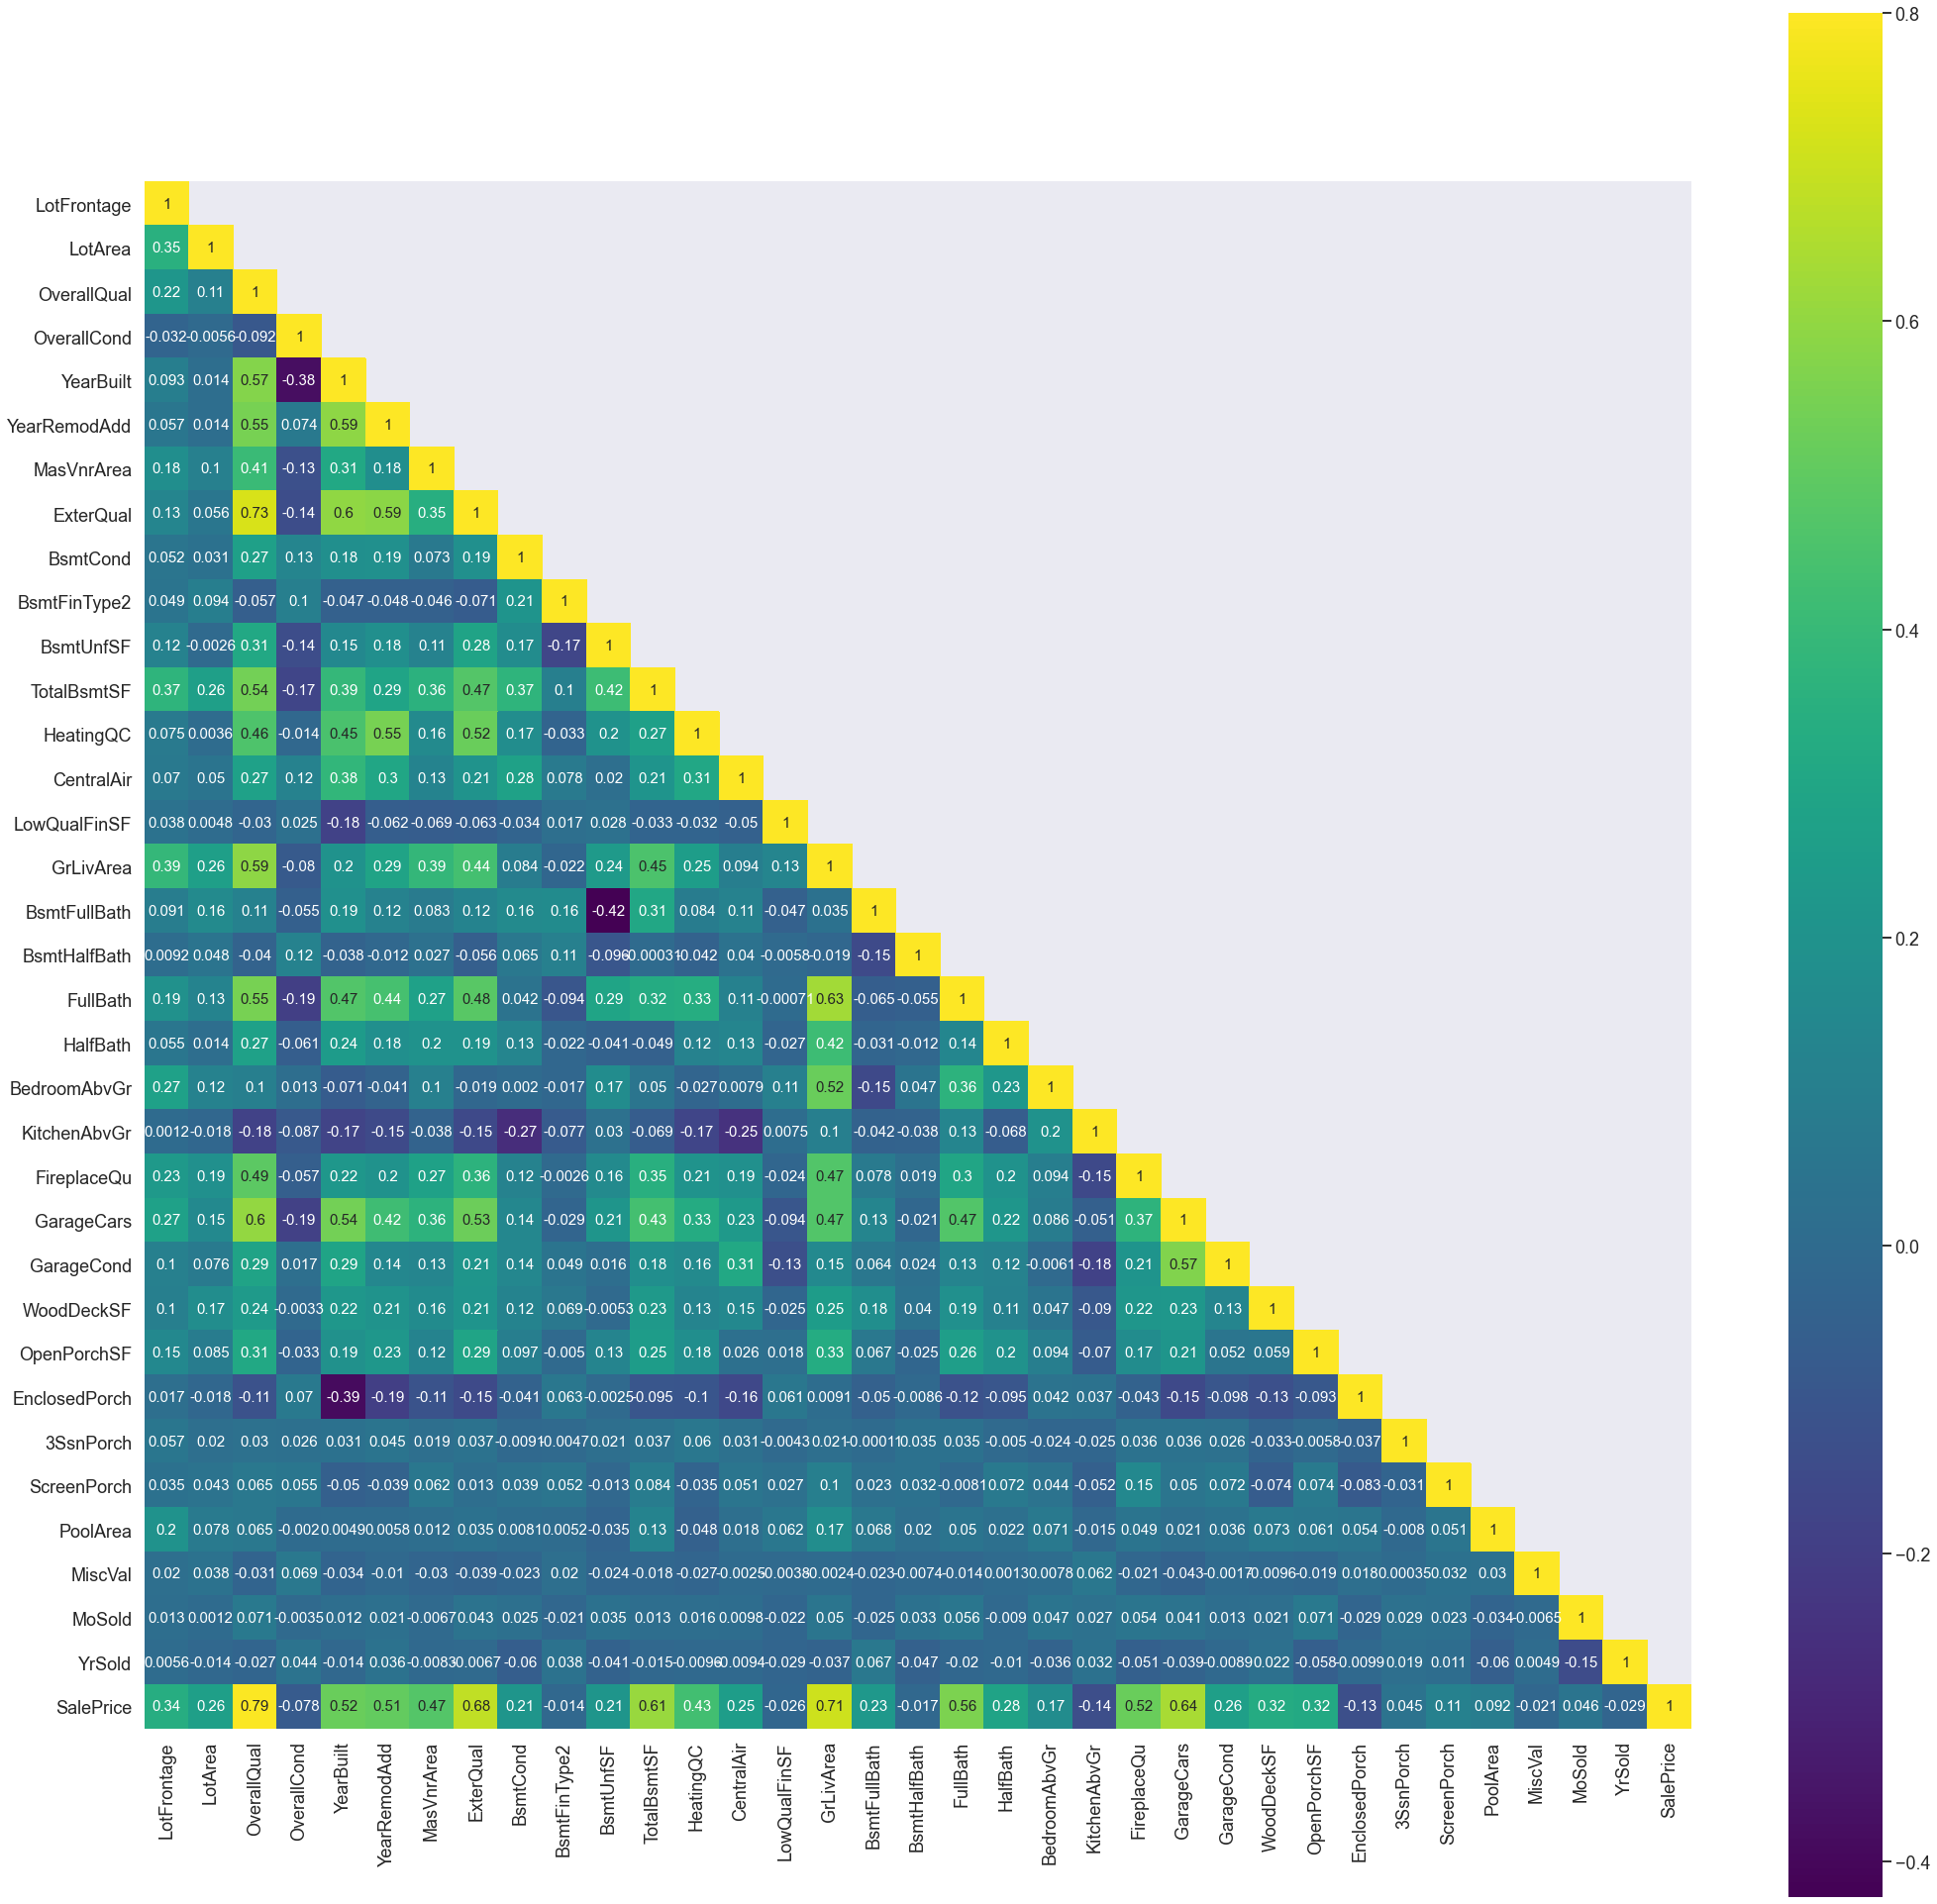

In [106]:
#heatmap correlation matrix with mask 
df_num_c=df_num1.drop(columns= ['BsmtFinType1', 'GarageYrBlt', 'GarageArea','GarageQual', 'BsmtFinSF1',
                          '1stFlrSF','2ndFlrSF','TotRmsAbvGrd','ExterCond', 'KitchenQual', 
                                'Fireplaces','BsmtQual', 'BsmtFinSF2'])
plt.figure(figsize=(35,35))
mask=np.array(df_num_c.corr())
mask[np.tril_indices_from(mask)] = False

sns.heatmap(df_num_c.corr(), annot=True,mask=mask, vmax=.8, square=True, cmap='viridis', annot_kws={'size':15})

plt.show()

In [107]:
df_vot_clean=df_vot.drop(columns= ['BsmtFinType1', 'GarageYrBlt', 'GarageArea','GarageQual', 'BsmtFinSF1',
                          '1stFlrSF','2ndFlrSF','TotRmsAbvGrd','ExterCond', 'KitchenQual', 
                                'Fireplaces','BsmtQual', 'BsmtFinSF2'])

In [108]:
df_vot_clean.head(3)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtCond,BsmtExposure,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Functional,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,4,PConc,3,No,1,150.0,856.0,GasA,5,1,SBrkr,0,1710,1.0,0.0,2,1,3,1,Typ,0,Attchd,RFn,2.0,3,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500.0
2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,3,CBlock,3,Gd,1,284.0,1262.0,GasA,5,1,SBrkr,0,1262,0.0,1.0,2,0,3,1,Typ,3,Attchd,RFn,2.0,3,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500.0
3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,4,PConc,3,Mn,1,434.0,920.0,GasA,5,1,SBrkr,0,1786,1.0,0.0,2,1,3,1,Typ,3,Attchd,RFn,2.0,3,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500.0


In [109]:
 df_vot_clean.LandSlope.value_counts()

Gtl    2778
Mod     125
Sev      16
Name: LandSlope, dtype: int64

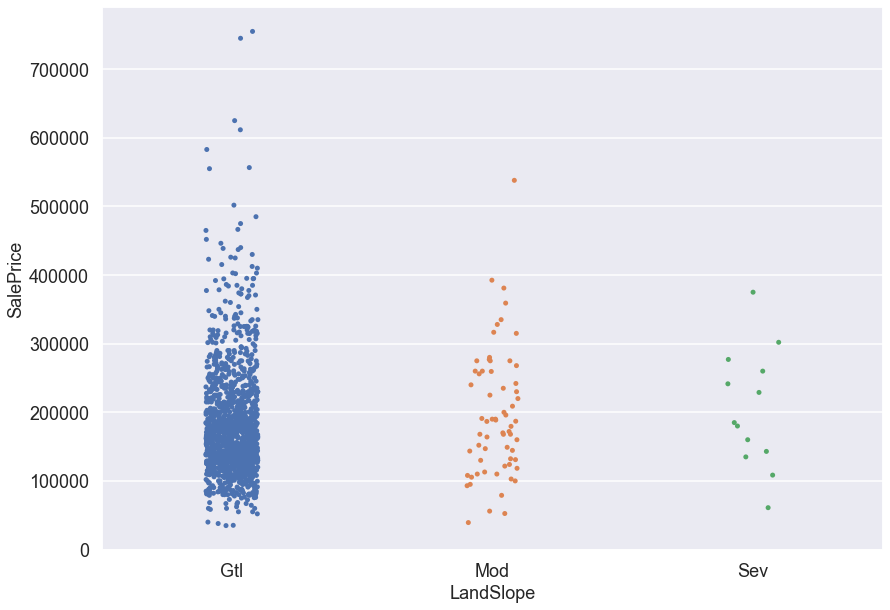

In [110]:
sns.stripplot('LandSlope', 'SalePrice', data=df_vot_clean)

In [111]:
df_vot_cat=df_vot_clean.select_dtypes(include=['category','object'])
df_vot_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 1 to 2919
Data columns (total 28 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   MSSubClass     2919 non-null   category
 1   MSZoning       2919 non-null   object  
 2   Street         2919 non-null   object  
 3   LotShape       2919 non-null   object  
 4   LandContour    2919 non-null   object  
 5   Utilities      2919 non-null   object  
 6   LotConfig      2919 non-null   object  
 7   LandSlope      2919 non-null   object  
 8   Neighborhood   2919 non-null   object  
 9   Condition1     2919 non-null   object  
 10  Condition2     2919 non-null   object  
 11  BldgType       2919 non-null   object  
 12  HouseStyle     2919 non-null   object  
 13  RoofStyle      2919 non-null   object  
 14  RoofMatl       2919 non-null   object  
 15  Exterior1st    2919 non-null   object  
 16  Exterior2nd    2919 non-null   object  
 17  MasVnrType     2919 non-null   ob

In [112]:
cat_cols_to_drop=['Utilities','Condition2', 'Exterior1st' ,'Exterior2nd','BsmtExposure','Electrical'] 

In [113]:
 df_vot_clean= df_vot_clean.drop(columns=cat_cols_to_drop)

In [238]:
df_vot_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 1 to 2919
Data columns (total 57 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   MSSubClass     2919 non-null   category
 1   MSZoning       2919 non-null   object  
 2   LotFrontage    2919 non-null   float64 
 3   LotArea        2919 non-null   int64   
 4   Street         2919 non-null   object  
 5   LotShape       2919 non-null   object  
 6   LandContour    2919 non-null   object  
 7   LotConfig      2919 non-null   object  
 8   LandSlope      2919 non-null   int64   
 9   Neighborhood   2919 non-null   object  
 10  Condition1     2919 non-null   object  
 11  BldgType       2919 non-null   object  
 12  HouseStyle     2919 non-null   object  
 13  OverallQual    2919 non-null   int64   
 14  OverallCond    2919 non-null   int64   
 15  YearBuilt      2919 non-null   int64   
 16  YearRemodAdd   2919 non-null   int64   
 17  RoofStyle      2919 non-null   ob

In [240]:
df_num_=df_vot_clean.select_dtypes(exclude=['category','object'])
df_num_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 1 to 2919
Data columns (total 36 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotFrontage    2919 non-null   float64
 1   LotArea        2919 non-null   int64  
 2   LandSlope      2919 non-null   int64  
 3   OverallQual    2919 non-null   int64  
 4   OverallCond    2919 non-null   int64  
 5   YearBuilt      2919 non-null   int64  
 6   YearRemodAdd   2919 non-null   int64  
 7   MasVnrArea     2919 non-null   float64
 8   ExterQual      2919 non-null   int64  
 9   BsmtCond       2919 non-null   int64  
 10  BsmtFinType2   2919 non-null   int64  
 11  BsmtUnfSF      2919 non-null   float64
 12  TotalBsmtSF    2919 non-null   float64
 13  HeatingQC      2919 non-null   int64  
 14  CentralAir     2919 non-null   int64  
 15  LowQualFinSF   2919 non-null   int64  
 16  GrLivArea      2919 non-null   int64  
 17  BsmtFullBath   2919 non-null   float64
 18  BsmtHalf

In [115]:
mapping4={'Gtl':3, 'Mod':2,'Sev':1}

df_vot_clean['LandSlope']=df_vot_clean['LandSlope'].map(mapping4)

In [116]:
df_vot_clean['LandSlope'].value_counts()

3    2778
2     125
1      16
Name: LandSlope, dtype: int64

In [117]:
df_vot_fin=pd.get_dummies(df_vot_clean, drop_first=True)

In [118]:
df_vot_fin.shape

(2919, 164)

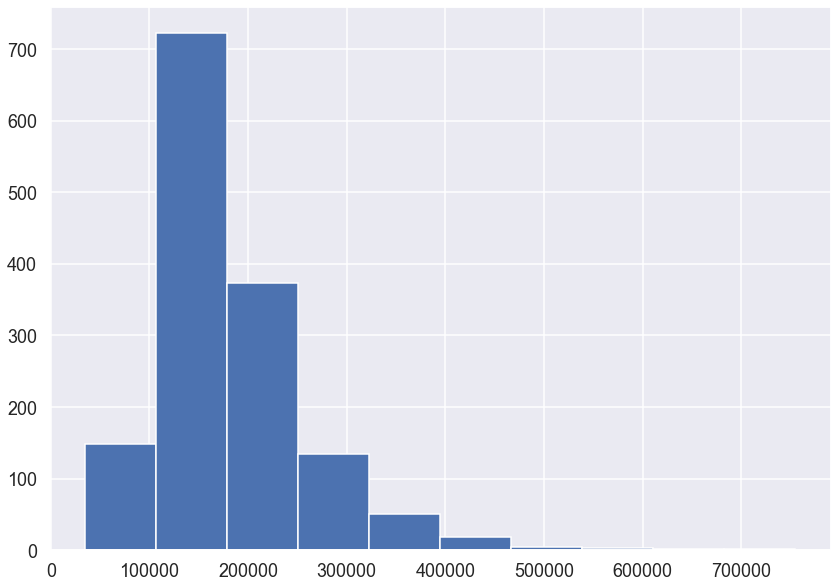

In [119]:
df_vot_fin['SalePrice'].hist()

In [120]:
df_vot_fin['SalePrice']=np.log(df_vot_fin['SalePrice'])

In [121]:
df_new2=df_vot_fin.iloc[:1460]

In [122]:
from sklearn.utils import shuffle

df_new2=shuffle(df_new2)

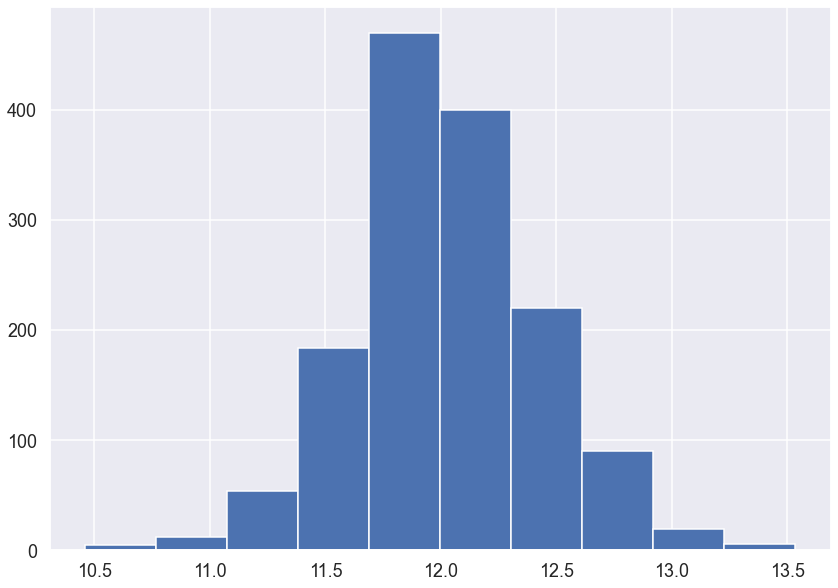

In [123]:
df_new2['SalePrice'].hist()

In [274]:
X=df_new2.drop(columns='SalePrice')
y=df_new2.SalePrice

In [275]:
from sklearn.preprocessing import MinMaxScaler

In [276]:
scaler = MinMaxScaler()

In [278]:
X_train=scaler.fit_transform(X_train)

In [279]:
X_test=scaler.transform(X)

In [280]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1,random_state=42)

In [281]:
from sklearn.ensemble import VotingRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso


In [282]:
svm_reg = SVR(kernel="linear", epsilon=1.5)
lasso=Lasso(alpha=0.5, tol=0.001)
rf=RandomForestRegressor()


vote = VotingRegressor(estimators=[('svm', svm_reg), ('lasso', lasso), ('rf', rf)])



In [283]:
vote = vote.fit(X_train, y_train)

In [284]:
predictions=vote.predict(X_test)

In [285]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.14119922065822524
MSE: 0.03659370055605312
RMSE: 0.19129480012810887


In [286]:
predictions
np.exp(predictions)

array([204120.35111177, 164341.17964609, 252726.52261002, 283916.71309251,
       139258.08283569, 119061.51820157, 169849.01470006, 210703.40185316,
       250659.00272287, 113136.81441511, 197464.24564721, 130614.9710481 ,
       212468.3890855 , 162162.65843779, 149066.29947965, 192538.09449589,
       138342.43808513, 245099.37833251, 197187.6289659 , 216723.40093217,
       186181.58200631, 175806.13410263, 152305.13887731, 106224.62923641,
       147995.75118974, 136053.11766905, 138552.95989544, 294356.04379959,
       162067.79289874, 177945.84225108, 180607.4636322 , 131016.86929847,
       176484.45282437, 127101.03419992, 240025.81664232, 120951.64843798,
       252398.39947134, 133197.74481918, 177014.31791161, 135191.40393769,
       159780.19154004, 240528.06396079, 135018.86340473, 138314.5650946 ,
       134748.00240857, 172809.9777021 , 106171.0977285 , 139155.8184568 ,
       153061.13690482, 149131.3596256 , 190370.69193018, 109979.58569473,
       144704.42565966, 1

## Submission

In [287]:
df_vot_fin.shape

(2919, 164)

In [310]:
def divide_df(df_vot_fin):
    return df_vot_fin.iloc[:1460], df_vot_fin.iloc[1460:]

In [311]:
X_train, X_test=divide_df(df_vot_fin.drop(columns='SalePrice'))
y_train=df_vot_fin.iloc[:1460].SalePrice

In [312]:
print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)

X_train shape: (1460, 163)
y_train shape: (1460,)
X_test shape: (1459, 163)


In [314]:
from sklearn.preprocessing import MinMaxScaler

In [315]:
scaler = MinMaxScaler()

In [316]:
scaler.fit(X_train)


MinMaxScaler()

In [317]:
X_train = scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [318]:
vote = vote.fit(X_train, y_train)

In [319]:
predictions=vote.predict(X_test)

In [320]:
pred=np.exp(predictions)

In [321]:

test=pd.read_csv('test.csv')

submission7=pd.DataFrame({'Id':test['Id'], 'SalePrice':pred})

In [322]:
submission7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id         1459 non-null   int64  
 1   SalePrice  1459 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 22.9 KB


In [323]:
submission7['SalePrice'].dtypes

dtype('float64')

In [327]:
submission7.to_csv('submission8.csv', index=False)

In [324]:
submission3.head()

,Id,SalePrice
0,1461,153063.529687
1,1462,150442.339895
2,1463,169629.328040
3,1464,170772.226315
4,1465,181747.735756


In [325]:
submission3.describe()

,Id,SalePrice
count,1459.000000,1459.000000
mean,2190.000000,165387.342820
std,421.321334,22662.380471
min,1461.000000,110501.224374
25%,1825.500000,150036.843488
50%,2190.000000,161386.157601
75%,2554.500000,178528.674770
max,2919.000000,256184.912644


In [309]:
missing_values_table(df_vot_fin.iloc[1460:])

Your selected dataframe has 164 columns.
There are 1 columns that have missing values.


,Missing Values,% of Total Values
SalePrice,1459,100.0


## PCA

In [377]:
df_vot_fin.shape

(2919, 164)

In [405]:
def divide_df(df_vot_fin):
    return df_vot_fin.iloc[:1460], df_vot_fin.iloc[1460:]

In [406]:
X_train, X_test=divide_df(df_vot_fin.drop(columns='SalePrice'))
y_train=df_vot_fin.iloc[:1460].SalePrice

In [407]:
from sklearn.decomposition import PCA

In [408]:
pca = PCA(n_components=80)

#cumsum = np.cumsum(pca.explained_variance_ratio_)
#d = np.argmax(cumsum >= 0.95) + 1



In [409]:
X_train=pca.fit_transform(X_train)
X_test=pca.transform(X_test)

In [411]:
# Number of trees in random forest
n_estimators=[int(x) for x in np.linspace(start = 200, stop = 1000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 288, 377, 466, 555, 644, 733, 822, 911, 1000]}


In [412]:

rf=RandomForestRegressor(random_state=0)

rf_random=RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 10, scoring='neg_mean_absolute_error', 
                              cv = 3, verbose=2, random_state=42, n_jobs=-1,
                              return_train_score=True)

In [413]:
rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  3.1min finished


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=0),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 288, 377, 466,
                                                         555, 644, 733, 822,
                                                         911, 1000]},
                   random_state=42, return_train_score=True,
                   scoring='neg_mean_absolute_error', verbose=2)

In [414]:
rf_random.best_estimator_

RandomForestRegressor(max_depth=50, min_samples_leaf=2, min_samples_split=5,
                      n_estimators=1000, random_state=0)

In [415]:
best_rand=rf_random.best_estimator_

In [416]:
predictions=best_rand.predict(X_test)

In [417]:
pred=np.exp(predictions)


In [418]:
test=pd.read_csv('test.csv')

submission_rand=pd.DataFrame({'Id':test['Id'], 'SalePrice':pred})

In [419]:
submission_rand[submission_rand['SalePrice']=='inf']

,Id,SalePrice


In [420]:
submission_rand.to_csv('submission_rand.csv', index=False)

In [421]:
submission_rand.describe()

,Id,SalePrice
count,1459.000000,1459.000000
mean,2190.000000,174725.905210
std,421.321334,63116.331810
min,1461.000000,63445.378139
25%,1825.500000,130426.755585
50%,2190.000000,156328.009204
75%,2554.500000,203605.514019
max,2919.000000,437837.929057
